In [2]:
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score

In [4]:
# from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [5]:
kredki = plt.imread('pencils.jpg')

In [6]:
kredki.shape

(427, 640, 3)

In [7]:
kredki_flat = kredki.reshape(-1, 3)

In [8]:
kredki_flat.shape

(273280, 3)

In [9]:
%%time
ks = range(2, 20)

# sylwetki = []
inercje = []
calinski = []
db_score = []


for k in ks:
    km = KMeans(n_clusters=k, random_state=0).fit(kredki_flat)
#     sylwetki.append(silhouette_score(kredki_flat, km.predict(kredki_flat)))
    inercje.append(km.inertia_)
    calinski.append(calinski_harabasz_score(kredki_flat, km.predict(kredki_flat)))
    db_score.append(davies_bouldin_score(kredki_flat, km.predict(kredki_flat)))

Wall time: 2min 32s


In [18]:
# %%time
# silhouette_score(kredki_flat, km.predict(kredki_flat))
# adjusted_mutual_info_score(km.labels_, km.predict(kredki_flat))
# calinski_harabasz_score(kredki_flat, km.predict(kredki_flat))
# davies_bouldin_score(kredki_flat, km.predict(kredki_flat))

In [12]:
inercje_df = pd.DataFrame({'K': ks,
                           'Inercja': inercje})
calinski_df = pd.DataFrame({'K': ks,
                           'Calinski': calinski})
db_score_df = pd.DataFrame({'K': ks,
                           'db_score': db_score})

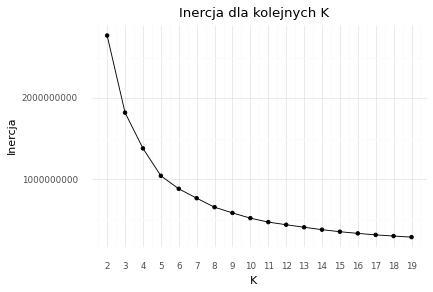

<ggplot: (168884482931)>

In [13]:
(ggplot(inercje_df, aes(x = 'K', y='Inercja'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Inercja dla kolejnych K'))

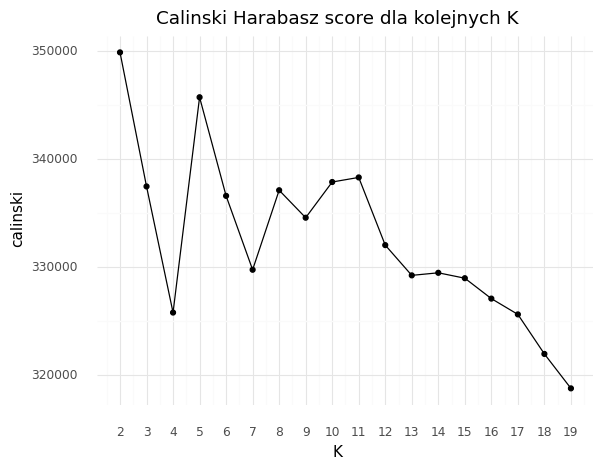

<ggplot: (168884613623)>

In [14]:
(ggplot(calinski_df, aes(x = 'K', y='calinski'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Calinski Harabasz score dla kolejnych K'))

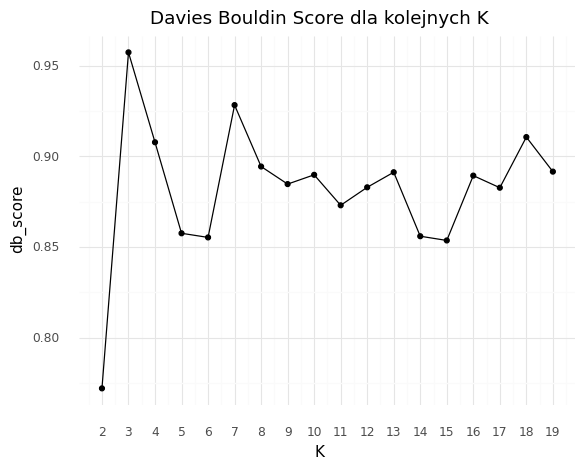

<ggplot: (168884750550)>

In [15]:
(ggplot(db_score_df, aes(x = 'K', y='db_score'))+
 geom_point() +
 scale_x_continuous(breaks = ks) +
 geom_line() +
 theme_minimal() +
 labs(title= 'Davies Bouldin Score dla kolejnych K'))

### Podsumowanie
#### Algorytm inercji - według tego algorytmu optymalnym wynikiem wydaje się być 5 klastrów <br> Algorytm Calinski Harabasz - według tego algorytmu najlepszym wynikiem będą 4 klastry <br> Algorytm Davies Bouldin Score - według tego algorytmu optymalnym wynikiem będzie 5 lub 6 klastrów (nie licząć jednego klastra, dla którego wyszedł najlepszy wynik, ponieważ im współczynnik mniejszy tym lepiej)
Na podstawie trzech metryk z sklearna, można stwierdzić że pięć grup (klastrów) będzie optymalną liczbą kolorów do odwzorowania kredek. (4 klastry dla kredek + 1 klaster dla tła na obrazku). Niestety algorytm silhouette jest zbyt skomplikowany do tego typu wyliczeń, ponieważ jego obliczenia trwają bardzo długo.

In [16]:
km = KMeans(n_clusters=5, random_state=0).fit(kredki_flat)

kredki_flat5 = kredki_flat.copy()

for i in np.unique(km.labels_):
    kredki_flat5[km.labels_ == i, :] = km.cluster_centers_[i]
    
kredki_test = kredki_flat5.reshape(kredki.shape)

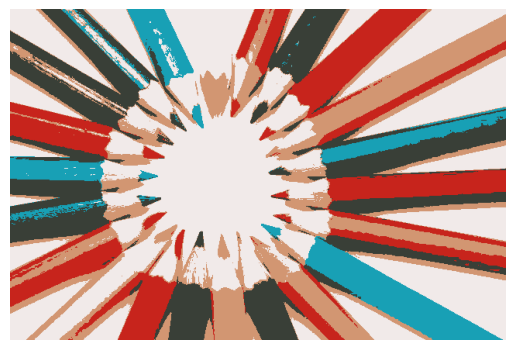

In [17]:
plt.imshow(kredki_test)
plt.axis('off');